In [4]:
import pandas as pd
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from datetime import datetime,date,time,timedelta
%matplotlib inline

In [5]:
nifty = get_history(symbol="NIFTY", 
                    start=date(2020,1,30), 
                    end=date(2021,8,11),index=True)

In [6]:
nifty.tail()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2021-08-05,16288.95,16349.45,16210.30,16294.60,418174517,3.138678e+11
2021-08-06,16304.40,16336.75,16223.30,16238.20,320087281,2.471617e+11
2021-08-09,16281.35,16320.75,16179.05,16258.25,240452917,1.830203e+11
2021-08-10,16274.80,16359.25,16202.25,16280.10,287989486,2.260038e+11
2021-08-11,16327.30,16338.75,16162.55,16282.25,277895886,2.030659e+11


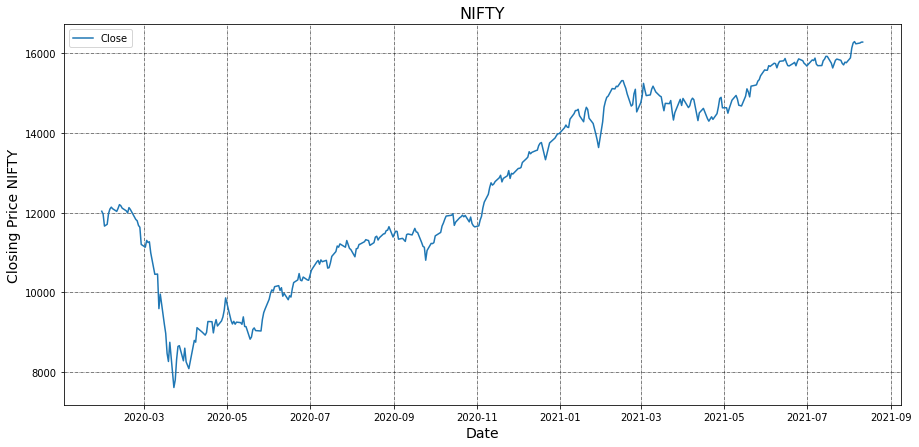

In [7]:
n=nifty['Close']


# Plot all the close prices
n.plot(figsize=(15, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("NIFTY", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Closing Price NIFTY', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [8]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2020-01-30,12147.75,12150.30,12010.60,12035.80,538138743,1.937267e+11
2020-01-31,12100.40,12103.55,11945.85,11962.10,771278258,2.604491e+11
2020-02-01,11939.00,12017.35,11633.30,11661.85,537634767,2.059812e+11
2020-02-03,11627.45,11749.85,11614.50,11707.90,669815788,2.541526e+11
2020-02-04,11786.25,11986.15,11783.40,11979.65,560430291,2.233850e+11


In [9]:
import pandas as pd
Covid_19=pd.read_csv("covid_19_india.csv")
Covid_19

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [10]:
Covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [11]:
Covid_19.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [12]:
Covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [13]:
# Dropping the columns that are not important in analysis
Covid_19.drop(["Sno", "Time","State/UnionTerritory", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace = True, axis = 1)

In [14]:
Covid_19.isnull().sum()

Date         0
Cured        0
Deaths       0
Confirmed    0
dtype: int64

In [15]:
# Changing dtype of Date
Covid_19['Date'] = pd.to_datetime(Covid_19['Date'], format = '%Y-%m-%d')

In [16]:
# Finding the Active Cases 
Covid_19['Active_Cases']=Covid_19['Confirmed']-(Covid_19['Cured']+Covid_19['Deaths'])
Covid_19.tail()

,Date,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,638410,3831,650353,8112
18106,2021-08-11,77811,773,80660,2076
18107,2021-08-11,334650,7368,342462,444
18108,2021-08-11,1685492,22775,1708812,545
18109,2021-08-11,1506532,18252,1534999,10215


In [17]:
#Active_Case=Covid_19.groupby("Date").sum()["Active_Cases"].reset_index()
# Select Confirmed, Deaths and Revovered columns by date
covid_sum_df = Covid_19.groupby('Date')['Confirmed', 'Deaths', 'Cured'].sum().sort_values('Date', ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [18]:
#Active_Case.tail()
covid_sum_df

,Confirmed,Deaths,Cured
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0
...,...,...,...
2021-08-07,31895385,427371,31055861
2021-08-08,31934455,427862,31099771
2021-08-09,31969954,428309,31139457


In [19]:
covid_sum_df.tail()

,Confirmed,Deaths,Cured
Date,,,
2021-08-07,31895385,427371,31055861
2021-08-08,31934455,427862,31099771
2021-08-09,31969954,428309,31139457
2021-08-10,31998158,428682,31180968
2021-08-11,32036511,429179,31220981


In [20]:
covid_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 2020-01-30 to 2021-08-11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  560 non-null    int64
 1   Deaths     560 non-null    int64
 2   Cured      560 non-null    int64
dtypes: int64(3)
memory usage: 17.5 KB


In [21]:
#Descriptive Statistics
covid_sum_df.describe()

,Confirmed,Deaths,Cured
count,5.600000e+02,560.000000,5.600000e+02
mean,9.735141e+06,131051.794643,9.010938e+06
std,1.018800e+07,127643.495163,9.700904e+06
min,1.000000e+00,0.000000,0.000000e+00
25%,3.637258e+05,12153.500000,1.924775e+05
50%,8.338981e+06,123963.000000,7.684144e+06
75%,1.174743e+07,160503.750000,1.121178e+07
max,3.203651e+07,429179.000000,3.122098e+07


In [22]:
#Finance Data

stocks = ['BHARATFORG','HINDALCO','NIITLTD','TCS','MINDTREE',"VEDL","NATIONALUM","NMDC","VIVIMEDLAB","IPCALAB",'BIOCON',
          "AARTIIND","DHANUKA","RALLIS","INSECTICID",
          "SHARDACROP","TATAMOTORS","MOTHERSUMI","APOLLOTYRE",
          "JKTYRE","HAVELLS","VGUARD","ASIANPAINT","BAJAJCON","JYOTHYLAB","SUNPHARMA",
          "LUPIN","AUROPHARMA","DRREDDY","KPRMILL","RAYMOND","TRIDENT","GOKEX"]
#start = datetime.today() - timedelta(365)
#end = datetime.today()
start=date(2020,1,30)
end=date(2021,8,11)
close_price = {}

for tickers in stocks:
    close_price[tickers] = get_history(tickers,start,end)['Close']

In [23]:
type(close_price)
stocks = pd.DataFrame.from_dict(close_price) 
stocks

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
2020-01-30,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00
2020-01-31,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35
2020-02-01,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25
2020-02-03,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15
2020-02-04,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,781.20,443.10,319.10,3283.95,2834.55,311.85,96.60,180.05,21.85,2134.60,384.15,921.85,933.15,312.65,812.05,327.65,299.70,236.90,222.40,162.05,1216.25,249.60,2988.40,272.45,172.95,786.15,1145.30,908.10,4782.30,1972.45,436.35,21.05,219.05
2021-08-06,779.60,442.15,323.85,3309.80,2841.70,314.15,94.20,178.35,24.00,2171.35,383.60,956.25,922.55,311.60,810.00,330.95,300.05,236.15,223.35,160.95,1232.90,249.05,2966.45,268.85,172.20,785.20,1150.85,901.30,4786.30,1964.65,439.25,20.35,230.00
2021-08-09,775.10,434.70,321.45,3322.70,2811.50,309.55,82.75,174.45,23.60,2293.15,382.25,951.65,921.05,313.15,806.60,319.45,298.10,230.90,222.95,152.05,1235.50,243.00,2992.55,264.80,170.60,788.80,1133.70,887.70,4818.50,1919.50,426.35,21.00,223.75
2021-08-10,750.80,426.95,306.45,3333.90,2797.75,304.75,78.30,168.40,22.85,2398.45,379.00,923.50,901.35,300.45,790.25,314.50,294.20,223.20,215.35,145.45,1223.85,240.50,2977.15,252.65,166.85,793.35,1119.90,879.50,4769.75,1814.95,408.85,19.95,214.80


In [24]:
# Merge by NIFTY and covid dataframes by Index
covid_finance_df = pd.merge(covid_sum_df,stocks, how='inner', left_index=True, right_index=True)

In [25]:
covid_finance_df

,Confirmed,Deaths,Cured,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
2020-01-30,1,0,0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00
2020-01-31,1,0,0,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35
2020-02-01,2,0,0,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25
2020-02-03,3,0,0,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15
2020-02-04,3,0,0,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,31812114,426290,30974748,781.20,443.10,319.10,3283.95,2834.55,311.85,96.60,180.05,21.85,2134.60,384.15,921.85,933.15,312.65,812.05,327.65,299.70,236.90,222.40,162.05,1216.25,249.60,2988.40,272.45,172.95,786.15,1145.30,908.10,4782.30,1972.45,436.35,21.05,219.05
2021-08-06,31856757,426754,31015844,779.60,442.15,323.85,3309.80,2841.70,314.15,94.20,178.35,24.00,2171.35,383.60,956.25,922.55,311.60,810.00,330.95,300.05,236.15,223.35,160.95,1232.90,249.05,2966.45,268.85,172.20,785.20,1150.85,901.30,4786.30,1964.65,439.25,20.35,230.00
2021-08-09,31969954,428309,31139457,775.10,434.70,321.45,3322.70,2811.50,309.55,82.75,174.45,23.60,2293.15,382.25,951.65,921.05,313.15,806.60,319.45,298.10,230.90,222.95,152.05,1235.50,243.00,2992.55,264.80,170.60,788.80,1133.70,887.70,4818.50,1919.50,426.35,21.00,223.75
2021-08-10,31998158,428682,31180968,750.80,426.95,306.45,3333.90,2797.75,304.75,78.30,168.40,22.85,2398.45,379.00,923.50,901.35,300.45,790.25,314.50,294.20,223.20,215.35,145.45,1223.85,240.50,2977.15,252.65,166.85,793.35,1119.90,879.50,4769.75,1814.95,408.85,19.95,214.80


In [26]:
# Info
covid_finance_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 382 entries, 2020-01-30 to 2021-08-11
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Confirmed   382 non-null    int64  
 1   Deaths      382 non-null    int64  
 2   Cured       382 non-null    int64  
 3   BHARATFORG  382 non-null    float64
 4   HINDALCO    382 non-null    float64
 5   NIITLTD     382 non-null    float64
 6   TCS         382 non-null    float64
 7   MINDTREE    382 non-null    float64
 8   VEDL        382 non-null    float64
 9   NATIONALUM  382 non-null    float64
 10  NMDC        382 non-null    float64
 11  VIVIMEDLAB  265 non-null    float64
 12  IPCALAB     382 non-null    float64
 13  BIOCON      382 non-null    float64
 14  AARTIIND    382 non-null    float64
 15  DHANUKA     382 non-null    float64
 16  RALLIS      382 non-null    float64
 17  INSECTICID  382 non-null    float64
 18  SHARDACROP  382 non-null    float64
 19  TATAMOTORS

In [27]:
#Confirmed = covid_df['Confirmed'].sum()
covid_sum = Covid_19.groupby('Date')['Confirmed', 'Deaths', 'Cured'].sum().max()
#recent_date = df['StartDate'].max()

#print (Confirmed)
print (covid_sum)

Confirmed    32036511
Deaths         429179
Cured        31220981
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



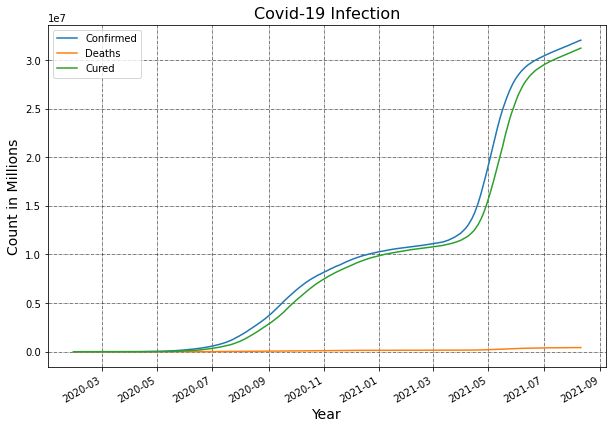

<Figure size 432x288 with 0 Axes>

In [28]:
CDR_df = covid_finance_df[['Confirmed','Deaths','Cured']]
# Plot all the close prices
CDR_df.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Covid-19 Infection", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Count in Millions', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()
plt.savefig("output.jpg")

In [29]:
fig = go.Figure()
fig.add_scatter(x = covid_finance_df.index, 
                y = covid_finance_df['Deaths'].diff(),
                mode ='lines',name="Deaths"
            )
fig.add_scatter(x = covid_finance_df.index, 
                y = covid_finance_df['Confirmed'].diff(),
                mode ='lines',name="Confirmed"
            )
fig.add_scatter(x = covid_finance_df.index, 
                y = covid_finance_df['Cured'].diff(),
                mode ='lines',name="Cured"
            )
fig.show()

In [30]:
#NIFTY Close Price Graph
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(
    y = nifty.Close,
    mode = 'lines'
))

fig.show()

In [31]:
CDRC_df = covid_finance_df[['Confirmed','Deaths','Cured','TCS']]
fig = go.Figure()
fig.add_scatter(x = covid_finance_df.index, 
                y = covid_finance_df['Deaths'].diff(),
                mode ='lines',name="Deaths"
            )
fig.add_scatter(x = covid_finance_df.index, 
                y = covid_finance_df['Confirmed'].diff(),
                mode ='lines',name="Confirmed"
            )
fig.add_scatter(x = covid_finance_df.index, 
                y = covid_finance_df['Cured'].diff(),
                mode ='lines',name="Cured"
            )
fig.add_scatter(x = covid_finance_df.index, 
                y = covid_finance_df['TCS'].diff(),
                mode ='lines',name="TCS"
            )

fig.show()


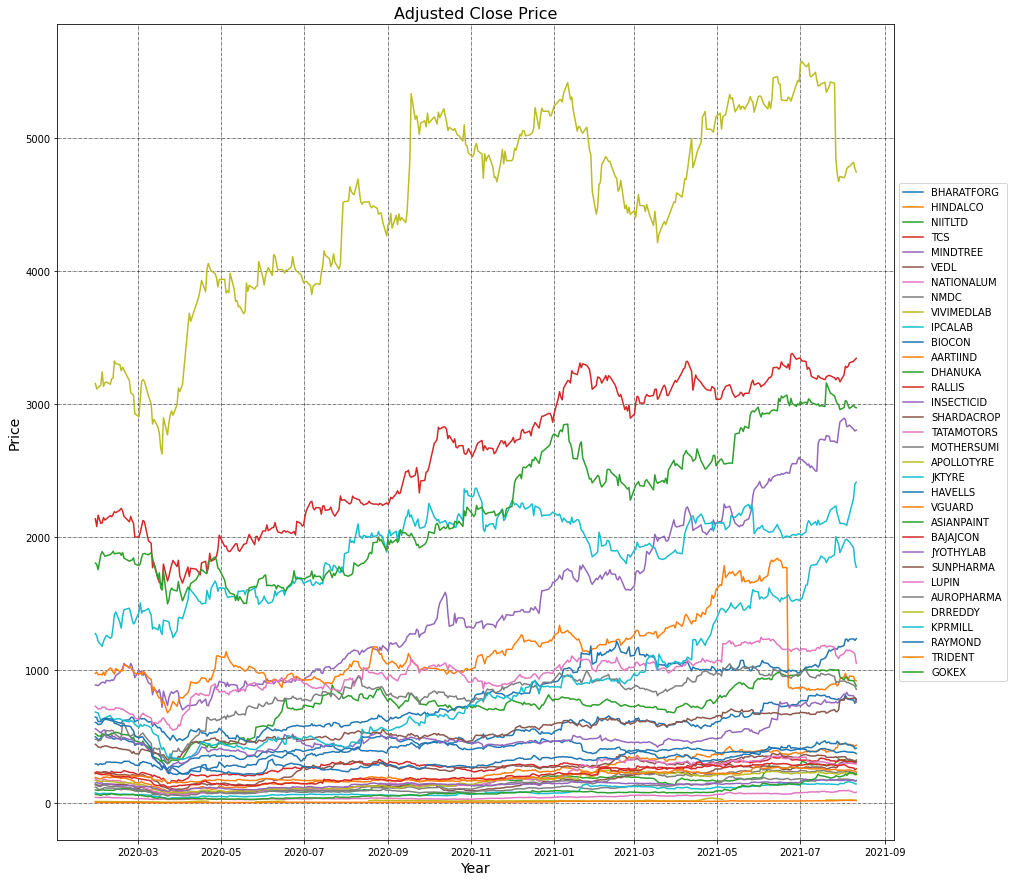

In [32]:
# Plot all the close prices
stocks.plot(figsize=(15, 15))
# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [33]:
stocks.columns

Index(['BHARATFORG', 'HINDALCO', 'NIITLTD', 'TCS', 'MINDTREE', 'VEDL',
       'NATIONALUM', 'NMDC', 'VIVIMEDLAB', 'IPCALAB', 'BIOCON', 'AARTIIND',
       'DHANUKA', 'RALLIS', 'INSECTICID', 'SHARDACROP', 'TATAMOTORS',
       'MOTHERSUMI', 'APOLLOTYRE', 'JKTYRE', 'HAVELLS', 'VGUARD', 'ASIANPAINT',
       'BAJAJCON', 'JYOTHYLAB', 'SUNPHARMA', 'LUPIN', 'AUROPHARMA', 'DRREDDY',
       'KPRMILL', 'RAYMOND', 'TRIDENT', 'GOKEX'],
      dtype='object')

In [35]:
import plotly.express as px
#df = px.data.stocks()
fig = px.line(stocks, x=stocks.index, y=stocks.columns,
             title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

ValueError: ignored

In [36]:
# Whole dataframe correlation examination
covid_corr = covid_finance_df.corr()
covid_corr

# Plotly heatmap

,Confirmed,Deaths,Cured,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
Confirmed,1.000000,0.993642,0.997573,0.899997,0.923746,0.921490,0.839144,0.967564,0.914202,0.938138,0.932197,0.681480,0.618526,0.278800,0.465722,0.763147,0.697702,0.823315,0.765572,0.838349,0.901344,0.801414,0.891054,0.812660,0.830332,0.927881,0.874164,0.761038,0.894098,0.813045,0.682914,0.720911,0.977773,0.359750,0.913918,0.938197
Deaths,0.993642,1.000000,0.996725,0.911523,0.911853,0.949573,0.853272,0.969830,0.895563,0.924449,0.905379,0.655307,0.648681,0.328471,0.408887,0.788635,0.717923,0.845152,0.782586,0.829275,0.890115,0.803701,0.890555,0.823142,0.814179,0.933687,0.861174,0.791367,0.895359,0.815375,0.694888,0.740214,0.968343,0.351535,0.913728,0.952395
Cured,0.997573,0.996725,1.000000,0.902749,0.916470,0.937242,0.836301,0.966398,0.905506,0.937372,0.923380,0.634050,0.602412,0.272284,0.427838,0.755947,0.686554,0.835625,0.756991,0.835427,0.895928,0.803273,0.896110,0.815314,0.837624,0.929467,0.867280,0.763781,0.886826,0.797990,0.666009,0.706499,0.975765,0.375203,0.914572,0.949203
BHARATFORG,0.899997,0.911523,0.902749,1.000000,0.937587,0.922542,0.913536,0.934203,0.917372,0.902038,0.901092,0.595173,0.613641,0.343312,0.477737,0.784664,0.746444,0.814888,0.872523,0.919184,0.937054,0.929962,0.924415,0.904017,0.872267,0.934703,0.932795,0.916119,0.874910,0.781101,0.712376,0.687419,0.923837,0.554342,0.923945,0.897859
HINDALCO,0.923746,0.911853,0.916470,0.937587,1.000000,0.875109,0.893250,0.958332,0.981114,0.956273,0.958503,0.649246,0.574465,0.284764,0.590159,0.734961,0.677756,0.743214,0.830181,0.944698,0.984631,0.920838,0.942067,0.908791,0.890845,0.915991,0.959659,0.794269,0.927239,0.804409,0.721900,0.656133,0.953733,0.459016,0.957197,0.860638
NIITLTD,0.921490,0.949573,0.937242,0.922542,0.875109,1.000000,0.871839,0.929546,0.847275,0.875713,0.837886,0.569216,0.636753,0.392070,0.336787,0.760416,0.696841,0.834166,0.766798,0.828347,0.865750,0.837044,0.882112,0.861830,0.802436,0.933296,0.834917,0.840971,0.874206,0.764134,0.682022,0.716052,0.914499,0.410327,0.904684,0.933396
TCS,0.839144,0.853272,0.836301,0.913536,0.893250,0.871839,1.000000,0.914570,0.848077,0.786585,0.804939,0.618072,0.741197,0.548450,0.571267,0.763494,0.691741,0.641617,0.835944,0.911818,0.899961,0.924984,0.879701,0.943946,0.791703,0.931561,0.895287,0.844654,0.889038,0.845242,0.819412,0.814206,0.841914,0.317716,0.920256,0.772425
MINDTREE,0.967564,0.969830,0.966398,0.934203,0.958332,0.929546,0.914570,1.000000,0.944442,0.936583,0.922687,0.671365,0.646360,0.347857,0.487875,0.771009,0.703877,0.797239,0.803814,0.895715,0.935745,0.866801,0.922193,0.887124,0.859750,0.946576,0.921883,0.809129,0.925014,0.835795,0.730694,0.733326,0.970269,0.371410,0.955641,0.916150
VEDL,0.914202,0.895563,0.905506,0.917372,0.981114,0.847275,0.848077,0.944442,1.000000,0.966164,0.969375,0.632355,0.499711,0.215943,0.575701,0.717530,0.680605,0.769080,0.798315,0.926929,0.964532,0.878755,0.928602,0.862438,0.905703,0.884800,0.946470,0.776088,0.911580,0.793125,0.681440,0.605691,0.947117,0.490462,0.947926,0.856702
NATIONALUM,0.938138,0.924449,0.937372,0.902038,0.956273,0.875713,0.786585,0.936583,0.966164,1.000000,0.965827,0.556337,0.442560,0.126349,0.438899,0.687164,0.634677,0.816865,0.744129,0.877531,0.928124,0.834725,0.925101,0.824250,0.894841,0.872845,0.905128,0.752411,0.884217,0.734448,0.605557,0.552252,0.969380,0.506040,0.930335,0.911926


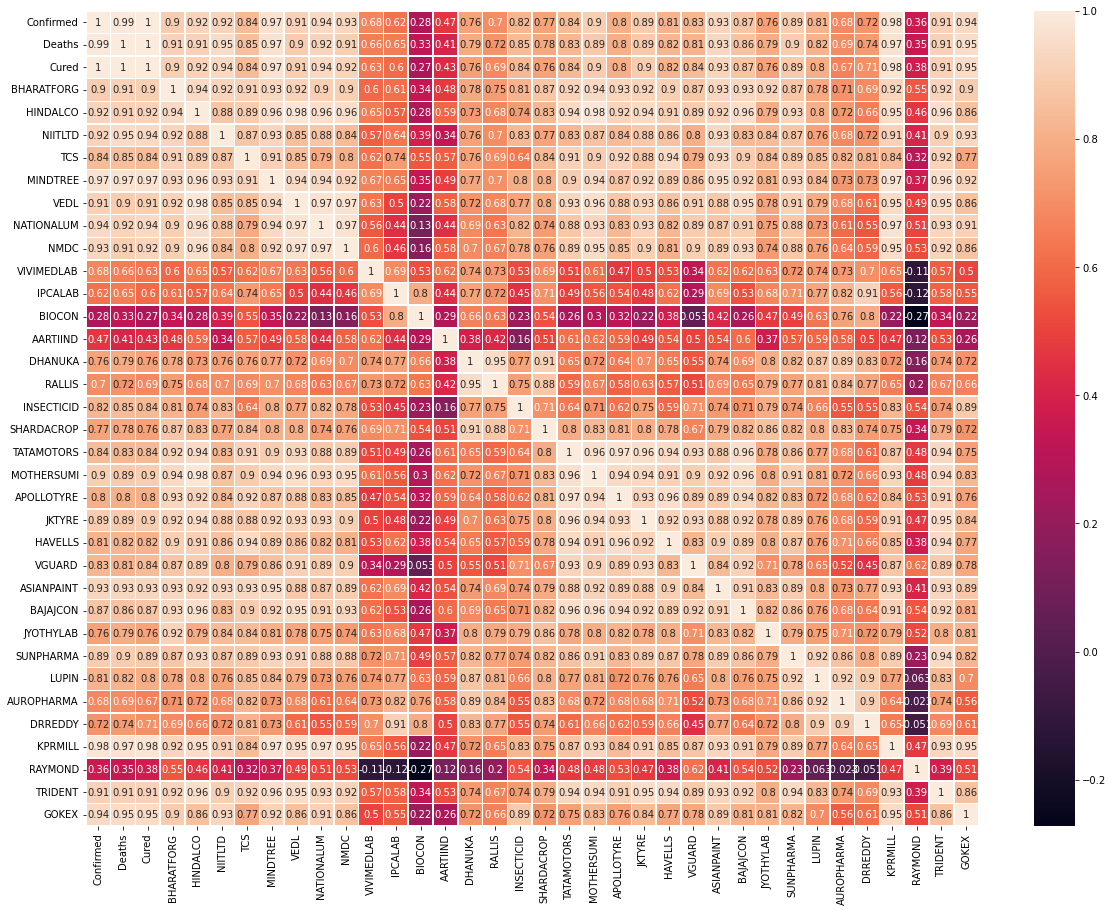

In [37]:

fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(covid_corr, annot=True, linewidths=.5, ax=ax)

In [38]:
# Returning only first and last row from dataframe
p_change_df = stocks.iloc[[0, -1]]
p_change_df

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
2020-01-30,499.2,193.45,98.60,2137.85,888.10,140.95,43.90,120.4,12.65,1274.50,295.35,975.9,522.9,229.75,560.10,223.8,186.20,138.9,171.45,78.1,606.90,222.80,1805.0,227.5,151.2,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00
2021-08-11,782.7,436.65,313.45,3344.20,2804.55,324.45,82.35,171.8,22.15,2413.25,372.65,919.5,881.4,299.65,758.85,312.2,295.45,224.4,213.50,144.8,1236.75,235.25,2972.6,257.7,167.2,779.55,1050.75,856.50,4744.85,1773.40,412.95,19.55,217.95


In [39]:
# Find percent of change between First and Last dates
Percent_df = p_change_df.pct_change(axis='rows')
Percent_df

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-11,0.567909,1.257172,2.179006,0.564282,2.157921,1.30188,0.875854,0.42691,0.750988,0.893488,0.261723,-0.057793,0.6856,0.304244,0.354847,0.394996,0.586735,0.615551,0.245261,0.854033,1.037815,0.05588,0.64687,0.132747,0.10582,0.763289,0.442644,0.783446,0.503986,1.587583,-0.362682,2.007692,2.302273


In [40]:
# Transpose dataframe
transposed_df = Percent_df.T
print(transposed_df)

            2020-01-30  2021-08-11
BHARATFORG         NaN    0.567909
HINDALCO           NaN    1.257172
NIITLTD            NaN    2.179006
TCS                NaN    0.564282
MINDTREE           NaN    2.157921
VEDL               NaN    1.301880
NATIONALUM         NaN    0.875854
NMDC               NaN    0.426910
VIVIMEDLAB         NaN    0.750988
IPCALAB            NaN    0.893488
BIOCON             NaN    0.261723
AARTIIND           NaN   -0.057793
DHANUKA            NaN    0.685600
RALLIS             NaN    0.304244
INSECTICID         NaN    0.354847
SHARDACROP         NaN    0.394996
TATAMOTORS         NaN    0.586735
MOTHERSUMI         NaN    0.615551
APOLLOTYRE         NaN    0.245261
JKTYRE             NaN    0.854033
HAVELLS            NaN    1.037815
VGUARD             NaN    0.055880
ASIANPAINT         NaN    0.646870
BAJAJCON           NaN    0.132747
JYOTHYLAB          NaN    0.105820
SUNPHARMA          NaN    0.763289
LUPIN              NaN    0.442644
AUROPHARMA         N

In [41]:
# Select all rows and the last column
trans_df = transposed_df.iloc[:, -1]

In [42]:
trans_df

BHARATFORG    0.567909
HINDALCO      1.257172
NIITLTD       2.179006
TCS           0.564282
MINDTREE      2.157921
VEDL          1.301880
NATIONALUM    0.875854
NMDC          0.426910
VIVIMEDLAB    0.750988
IPCALAB       0.893488
BIOCON        0.261723
AARTIIND     -0.057793
DHANUKA       0.685600
RALLIS        0.304244
INSECTICID    0.354847
SHARDACROP    0.394996
TATAMOTORS    0.586735
MOTHERSUMI    0.615551
APOLLOTYRE    0.245261
JKTYRE        0.854033
HAVELLS       1.037815
VGUARD        0.055880
ASIANPAINT    0.646870
BAJAJCON      0.132747
JYOTHYLAB     0.105820
SUNPHARMA     0.763289
LUPIN         0.442644
AUROPHARMA    0.783446
DRREDDY       0.503986
KPRMILL       1.587583
RAYMOND      -0.362682
TRIDENT       2.007692
GOKEX         2.302273
Name: 2021-08-11, dtype: float64

In [43]:
trans_df=trans_df*100
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}%'.format
trans_df

BHARATFORG    56.79%
HINDALCO     125.72%
NIITLTD      217.90%
TCS           56.43%
MINDTREE     215.79%
VEDL         130.19%
NATIONALUM    87.59%
NMDC          42.69%
VIVIMEDLAB    75.10%
IPCALAB       89.35%
BIOCON        26.17%
AARTIIND      -5.78%
DHANUKA       68.56%
RALLIS        30.42%
INSECTICID    35.48%
SHARDACROP    39.50%
TATAMOTORS    58.67%
MOTHERSUMI    61.56%
APOLLOTYRE    24.53%
JKTYRE        85.40%
HAVELLS      103.78%
VGUARD         5.59%
ASIANPAINT    64.69%
BAJAJCON      13.27%
JYOTHYLAB     10.58%
SUNPHARMA     76.33%
LUPIN         44.26%
AUROPHARMA    78.34%
DRREDDY       50.40%
KPRMILL      158.76%
RAYMOND      -36.27%
TRIDENT      200.77%
GOKEX        230.23%
Name: 2021-08-11, dtype: float64

In [44]:
type(trans_df)

pandas.core.series.Series

In [45]:
# Sort dataframe by Largest stock market loss to smallest
test = trans_df.sort_values(ascending=True)
print(test)

RAYMOND      -36.27%
AARTIIND      -5.78%
VGUARD         5.59%
JYOTHYLAB     10.58%
BAJAJCON      13.27%
APOLLOTYRE    24.53%
BIOCON        26.17%
RALLIS        30.42%
INSECTICID    35.48%
SHARDACROP    39.50%
NMDC          42.69%
LUPIN         44.26%
DRREDDY       50.40%
TCS           56.43%
BHARATFORG    56.79%
TATAMOTORS    58.67%
MOTHERSUMI    61.56%
ASIANPAINT    64.69%
DHANUKA       68.56%
VIVIMEDLAB    75.10%
SUNPHARMA     76.33%
AUROPHARMA    78.34%
JKTYRE        85.40%
NATIONALUM    87.59%
IPCALAB       89.35%
HAVELLS      103.78%
HINDALCO     125.72%
VEDL         130.19%
KPRMILL      158.76%
TRIDENT      200.77%
MINDTREE     215.79%
NIITLTD      217.90%
GOKEX        230.23%
Name: 2021-08-11, dtype: float64


In [46]:
#Visualize above with plotly


# best performing last 5(based on asending order)


In [47]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [48]:
CDR_corr = covid_corr.iloc[3:, : 3]

In [49]:
# Merge by Index
corr_loss = pd.merge(CDR_corr, test, how='inner', left_index=True, right_index=True)
corr_loss

,Confirmed,Deaths,Cured,2021-08-11
BHARATFORG,0.90,0.91,0.90,56.79
HINDALCO,0.92,0.91,0.92,125.72
NIITLTD,0.92,0.95,0.94,217.90
TCS,0.84,0.85,0.84,56.43
MINDTREE,0.97,0.97,0.97,215.79
VEDL,0.91,0.90,0.91,130.19
NATIONALUM,0.94,0.92,0.94,87.59
NMDC,0.93,0.91,0.92,42.69
VIVIMEDLAB,0.68,0.66,0.63,75.10
IPCALAB,0.62,0.65,0.60,89.35


In [50]:
# Rename Columns
corr_loss.columns = ['Confirmed', 'Deaths', 'Cured', '%Change']
corr_loss

,Confirmed,Deaths,Cured,%Change
BHARATFORG,0.90,0.91,0.90,56.79
HINDALCO,0.92,0.91,0.92,125.72
NIITLTD,0.92,0.95,0.94,217.90
TCS,0.84,0.85,0.84,56.43
MINDTREE,0.97,0.97,0.97,215.79
VEDL,0.91,0.90,0.91,130.19
NATIONALUM,0.94,0.92,0.94,87.59
NMDC,0.93,0.91,0.92,42.69
VIVIMEDLAB,0.68,0.66,0.63,75.10
IPCALAB,0.62,0.65,0.60,89.35


In [51]:
corr_loss.describe()

,Confirmed,Deaths,Cured,%Change
count,33.00,33.00,33.00,33.00
mean,0.80,0.80,0.79,76.45
std,0.17,0.17,0.17,65.98
min,0.28,0.33,0.27,-36.27
25%,0.76,0.78,0.76,35.48
50%,0.84,0.85,0.84,61.56
75%,0.91,0.91,0.91,89.35
max,0.98,0.97,0.98,230.23


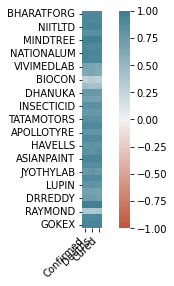

In [52]:

ax = sns.heatmap(
    CDR_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [53]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [54]:
# Confirmed and Walmart Correlation Coefficient and p-value
from scipy import stats
stats.pearsonr(covid_finance_df['Confirmed'],covid_finance_df['TCS'])

(0.8391440614709091, 1.5398939714946423e-102)

## Index Changing and new column Dates

In [55]:
df_copy=covid_finance_df.copy()

In [56]:
df_copy.head()

,Confirmed,Deaths,Cured,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
2020-01-30,1,0,0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00
2020-01-31,1,0,0,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35
2020-02-01,2,0,0,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25
2020-02-03,3,0,0,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15
2020-02-04,3,0,0,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25


In [57]:
covid_finance_df.head()

,Confirmed,Deaths,Cured,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
2020-01-30,1,0,0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00
2020-01-31,1,0,0,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35
2020-02-01,2,0,0,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25
2020-02-03,3,0,0,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15
2020-02-04,3,0,0,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25


In [58]:
df_copy['Dates'] = df_copy.index
df_copy.head(2)

,Confirmed,Deaths,Cured,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Dates
2020-01-30,1,0,0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,2020-01-30
2020-01-31,1,0,0,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,2020-01-31


In [59]:
df_copy.index = [i for i in range(0,len(df_copy))]
df_copy.head(2)

,Confirmed,Deaths,Cured,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Dates
0,1,0,0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,2020-01-30
1,1,0,0,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,2020-01-31


In [60]:
df_copy.head()

,Confirmed,Deaths,Cured,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Dates
0,1,0,0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,2020-01-30
1,1,0,0,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,2020-01-31
2,2,0,0,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25,2020-02-01
3,3,0,0,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15,2020-02-03
4,3,0,0,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25,2020-02-04


## Model Buidling

In [61]:
covid_finance_df_ML=covid_finance_df.copy()

In [62]:
covid_finance_df_ML['Active']=covid_finance_df_ML['Confirmed']-covid_finance_df_ML['Cured']

In [63]:
del covid_finance_df_ML['Confirmed']
del covid_finance_df_ML['Deaths']
del covid_finance_df_ML['Cured']

In [64]:
covid_finance_df_ML

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Active
2020-01-30,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,1
2020-01-31,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,1
2020-02-01,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25,2
2020-02-03,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15,3
2020-02-04,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,781.20,443.10,319.10,3283.95,2834.55,311.85,96.60,180.05,21.85,2134.60,384.15,921.85,933.15,312.65,812.05,327.65,299.70,236.90,222.40,162.05,1216.25,249.60,2988.40,272.45,172.95,786.15,1145.30,908.10,4782.30,1972.45,436.35,21.05,219.05,837366
2021-08-06,779.60,442.15,323.85,3309.80,2841.70,314.15,94.20,178.35,24.00,2171.35,383.60,956.25,922.55,311.60,810.00,330.95,300.05,236.15,223.35,160.95,1232.90,249.05,2966.45,268.85,172.20,785.20,1150.85,901.30,4786.30,1964.65,439.25,20.35,230.00,840913
2021-08-09,775.10,434.70,321.45,3322.70,2811.50,309.55,82.75,174.45,23.60,2293.15,382.25,951.65,921.05,313.15,806.60,319.45,298.10,230.90,222.95,152.05,1235.50,243.00,2992.55,264.80,170.60,788.80,1133.70,887.70,4818.50,1919.50,426.35,21.00,223.75,830497
2021-08-10,750.80,426.95,306.45,3333.90,2797.75,304.75,78.30,168.40,22.85,2398.45,379.00,923.50,901.35,300.45,790.25,314.50,294.20,223.20,215.35,145.45,1223.85,240.50,2977.15,252.65,166.85,793.35,1119.90,879.50,4769.75,1814.95,408.85,19.95,214.80,817190


In [65]:
covid_finance_df_ML['Dates'] = covid_finance_df_ML.index
covid_finance_df_ML.head(2)

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Active,Dates
2020-01-30,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,1,2020-01-30
2020-01-31,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,1,2020-01-31


In [66]:
covid_finance_df_ML.index = [i for i in range(0,len(covid_finance_df_ML))]
covid_finance_df_ML.head(2)

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Active,Dates
0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,1,2020-01-30
1,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,1,2020-01-31


In [67]:
del covid_finance_df_ML['Dates']

In [68]:
covid_finance_df_ML

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Active
0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,1
1,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,1
2,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25,2
3,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15,3
4,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,781.20,443.10,319.10,3283.95,2834.55,311.85,96.60,180.05,21.85,2134.60,384.15,921.85,933.15,312.65,812.05,327.65,299.70,236.90,222.40,162.05,1216.25,249.60,2988.40,272.45,172.95,786.15,1145.30,908.10,4782.30,1972.45,436.35,21.05,219.05,837366
378,779.60,442.15,323.85,3309.80,2841.70,314.15,94.20,178.35,24.00,2171.35,383.60,956.25,922.55,311.60,810.00,330.95,300.05,236.15,223.35,160.95,1232.90,249.05,2966.45,268.85,172.20,785.20,1150.85,901.30,4786.30,1964.65,439.25,20.35,230.00,840913
379,775.10,434.70,321.45,3322.70,2811.50,309.55,82.75,174.45,23.60,2293.15,382.25,951.65,921.05,313.15,806.60,319.45,298.10,230.90,222.95,152.05,1235.50,243.00,2992.55,264.80,170.60,788.80,1133.70,887.70,4818.50,1919.50,426.35,21.00,223.75,830497
380,750.80,426.95,306.45,3333.90,2797.75,304.75,78.30,168.40,22.85,2398.45,379.00,923.50,901.35,300.45,790.25,314.50,294.20,223.20,215.35,145.45,1223.85,240.50,2977.15,252.65,166.85,793.35,1119.90,879.50,4769.75,1814.95,408.85,19.95,214.80,817190


In [69]:
#separating independent and dependent variable
X = covid_finance_df_ML.iloc[:,0:33].values
y = covid_finance_df_ML.iloc[:,33].values
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [70]:
y = covid_finance_df_ML.iloc[:,33]

In [71]:
y

0           1
1           1
2           2
3           3
4           3
        ...  
377    837366
378    840913
379    830497
380    817190
381    815530
Name: Active, Length: 382, dtype: int64

In [72]:
ml_dataframe=covid_finance_df_ML.copy()

In [73]:
ml_dataframe

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX,Active
0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00,1
1,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35,1
2,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25,2
3,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15,3
4,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,781.20,443.10,319.10,3283.95,2834.55,311.85,96.60,180.05,21.85,2134.60,384.15,921.85,933.15,312.65,812.05,327.65,299.70,236.90,222.40,162.05,1216.25,249.60,2988.40,272.45,172.95,786.15,1145.30,908.10,4782.30,1972.45,436.35,21.05,219.05,837366
378,779.60,442.15,323.85,3309.80,2841.70,314.15,94.20,178.35,24.00,2171.35,383.60,956.25,922.55,311.60,810.00,330.95,300.05,236.15,223.35,160.95,1232.90,249.05,2966.45,268.85,172.20,785.20,1150.85,901.30,4786.30,1964.65,439.25,20.35,230.00,840913
379,775.10,434.70,321.45,3322.70,2811.50,309.55,82.75,174.45,23.60,2293.15,382.25,951.65,921.05,313.15,806.60,319.45,298.10,230.90,222.95,152.05,1235.50,243.00,2992.55,264.80,170.60,788.80,1133.70,887.70,4818.50,1919.50,426.35,21.00,223.75,830497
380,750.80,426.95,306.45,3333.90,2797.75,304.75,78.30,168.40,22.85,2398.45,379.00,923.50,901.35,300.45,790.25,314.50,294.20,223.20,215.35,145.45,1223.85,240.50,2977.15,252.65,166.85,793.35,1119.90,879.50,4769.75,1814.95,408.85,19.95,214.80,817190


In [74]:
X=ml_dataframe.iloc[:,0:33]

In [75]:
X

,BHARATFORG,HINDALCO,NIITLTD,TCS,MINDTREE,VEDL,NATIONALUM,NMDC,VIVIMEDLAB,IPCALAB,BIOCON,AARTIIND,DHANUKA,RALLIS,INSECTICID,SHARDACROP,TATAMOTORS,MOTHERSUMI,APOLLOTYRE,JKTYRE,HAVELLS,VGUARD,ASIANPAINT,BAJAJCON,JYOTHYLAB,SUNPHARMA,LUPIN,AUROPHARMA,DRREDDY,KPRMILL,RAYMOND,TRIDENT,GOKEX
0,499.20,193.45,98.60,2137.85,888.10,140.95,43.90,120.40,12.65,1274.50,295.35,975.90,522.90,229.75,560.10,223.80,186.20,138.90,171.45,78.10,606.90,222.80,1805.00,227.50,151.20,442.10,728.35,480.25,3154.85,685.35,647.95,6.50,66.00
1,490.65,189.35,98.20,2079.05,887.90,137.90,42.55,116.95,12.55,1256.45,294.35,985.10,514.65,235.45,553.15,233.00,176.60,133.70,166.50,74.45,602.80,225.45,1795.65,224.15,154.60,434.30,718.25,481.40,3114.50,680.90,643.40,6.25,65.35
2,474.80,184.40,95.45,2164.85,883.15,134.90,42.00,104.90,12.20,1216.70,287.25,965.60,505.45,233.10,544.15,227.45,165.60,128.25,165.60,71.70,591.20,222.65,1755.35,220.00,150.30,422.80,708.35,467.50,3123.05,678.85,613.20,6.20,64.25
3,488.45,181.80,99.05,2102.50,902.75,134.15,41.70,103.10,11.60,1192.60,298.50,969.05,503.25,231.75,529.00,226.70,163.85,125.15,161.05,70.20,594.35,218.30,1867.65,214.95,150.50,417.55,708.65,473.50,3144.15,621.30,614.60,6.20,58.15
4,502.30,189.25,99.65,2107.75,907.60,138.55,42.50,108.80,11.75,1179.75,290.10,963.25,524.90,229.60,539.65,231.00,165.70,134.05,161.55,73.20,608.05,215.80,1891.30,215.20,152.80,425.65,721.60,494.80,3241.85,630.25,629.65,6.15,62.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,781.20,443.10,319.10,3283.95,2834.55,311.85,96.60,180.05,21.85,2134.60,384.15,921.85,933.15,312.65,812.05,327.65,299.70,236.90,222.40,162.05,1216.25,249.60,2988.40,272.45,172.95,786.15,1145.30,908.10,4782.30,1972.45,436.35,21.05,219.05
378,779.60,442.15,323.85,3309.80,2841.70,314.15,94.20,178.35,24.00,2171.35,383.60,956.25,922.55,311.60,810.00,330.95,300.05,236.15,223.35,160.95,1232.90,249.05,2966.45,268.85,172.20,785.20,1150.85,901.30,4786.30,1964.65,439.25,20.35,230.00
379,775.10,434.70,321.45,3322.70,2811.50,309.55,82.75,174.45,23.60,2293.15,382.25,951.65,921.05,313.15,806.60,319.45,298.10,230.90,222.95,152.05,1235.50,243.00,2992.55,264.80,170.60,788.80,1133.70,887.70,4818.50,1919.50,426.35,21.00,223.75
380,750.80,426.95,306.45,3333.90,2797.75,304.75,78.30,168.40,22.85,2398.45,379.00,923.50,901.35,300.45,790.25,314.50,294.20,223.20,215.35,145.45,1223.85,240.50,2977.15,252.65,166.85,793.35,1119.90,879.50,4769.75,1814.95,408.85,19.95,214.80


In [76]:
y=ml_dataframe.iloc[:,33]

In [77]:
y

0           1
1           1
2           2
3           3
4           3
        ...  
377    837366
378    840913
379    830497
380    817190
381    815530
Name: Active, Length: 382, dtype: int64

In [78]:
data=ml_dataframe.copy()

In [79]:
data1=data.iloc[:,31:34]

In [80]:
data1_values=data1.values

In [81]:
data1_values

array([[6.50000e+00, 6.60000e+01, 1.00000e+00],
       [6.25000e+00, 6.53500e+01, 1.00000e+00],
       [6.20000e+00, 6.42500e+01, 2.00000e+00],
       ...,
       [2.10000e+01, 2.23750e+02, 8.30497e+05],
       [1.99500e+01, 2.14800e+02, 8.17190e+05],
       [1.95500e+01, 2.17950e+02, 8.15530e+05]])

In [82]:
X, y = data1_values[:, :-1], data1_values[:, -1]

In [83]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [84]:
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 514811.256 (74757.854)


In [85]:
#Returning only first and last row from dataframe
p_change_df = nifty.iloc[[0, -1]]
p_change_df

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2020-01-30,12147.75,12150.30,12010.60,12035.80,538138743,193726700000.00
2021-08-11,16327.30,16338.75,16162.55,16282.25,277895886,203065900000.00


In [86]:
#Find percent of change between First and Last dates
Percent_df = p_change_df.pct_change(axis='rows')
Percent_df

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2020-01-30,nan,nan,nan,nan,nan,nan
2021-08-11,0.34,0.34,0.35,0.35,-0.48,0.05


In [87]:
# Transpose dataframe
transposed_df = Percent_df.T
print(transposed_df)

Date      2020-01-30  2021-08-11
Open             nan        0.34
High             nan        0.34
Low              nan        0.35
Close            nan        0.35
Volume           nan       -0.48
Turnover         nan        0.05


In [88]:
# Select all rows and the last column
trans_df = transposed_df.iloc[:, -1]

In [89]:
trans_df*100

Open        34.41
High        34.47
Low         34.57
Close       35.28
Volume     -48.36
Turnover     4.82
Name: 2021-08-11, dtype: float64

In [90]:
trans_df=trans_df*100
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}%'.format
trans_df

Open        34.41%
High        34.47%
Low         34.57%
Close       35.28%
Volume     -48.36%
Turnover     4.82%
Name: 2021-08-11, dtype: float64

In [91]:
# Sort dataframe by Largest stock market loss to smallest
test = trans_df.sort_values(ascending=True)
print(test)

Volume     -48.36%
Turnover     4.82%
Open        34.41%
High        34.47%
Low         34.57%
Close       35.28%
Name: 2021-08-11, dtype: float64


In [92]:
nifty.Close.tail()

Date
2021-08-05   16294.60%
2021-08-06   16238.20%
2021-08-09   16258.25%
2021-08-10   16280.10%
2021-08-11   16282.25%
Name: Close, dtype: float64

In [94]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2020-01-30,12147.75%,12150.30%,12010.60%,12035.80%,538138743,193726700000.00%
2020-01-31,12100.40%,12103.55%,11945.85%,11962.10%,771278258,260449100000.00%
2020-02-01,11939.00%,12017.35%,11633.30%,11661.85%,537634767,205981200000.00%
2020-02-03,11627.45%,11749.85%,11614.50%,11707.90%,669815788,254152600000.00%
2020-02-04,11786.25%,11986.15%,11783.40%,11979.65%,560430291,223385000000.00%


In [95]:
nifty['Date'] = nifty.index
nifty.head()

,Open,High,Low,Close,Volume,Turnover,Date
Date,,,,,,,
2020-01-30,12147.75%,12150.30%,12010.60%,12035.80%,538138743,193726700000.00%,2020-01-30
2020-01-31,12100.40%,12103.55%,11945.85%,11962.10%,771278258,260449100000.00%,2020-01-31
2020-02-01,11939.00%,12017.35%,11633.30%,11661.85%,537634767,205981200000.00%,2020-02-01
2020-02-03,11627.45%,11749.85%,11614.50%,11707.90%,669815788,254152600000.00%,2020-02-03
2020-02-04,11786.25%,11986.15%,11783.40%,11979.65%,560430291,223385000000.00%,2020-02-04


In [96]:
ls = [x for x in range(382)]
nifty.index = ls

In [97]:
close = nifty.Close
close

0     12035.80%
1     11962.10%
2     11661.85%
3     11707.90%
4     11979.65%
         ...   
377   16294.60%
378   16238.20%
379   16258.25%
380   16280.10%
381   16282.25%
Name: Close, Length: 382, dtype: float64

In [98]:
df=pd.read_csv('ActiveCases_NIFTY_Price.csv')

### X and y arrays


In [99]:
X = df[['Active_Cases']]#'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               
y = df[['Close']]

In [100]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

In [104]:
print(lin_reg.intercept_)


[12748.13820225]


In [105]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1893.2230843225714
MSE: 4617653.918354069
RMSE: 2148.872708736855
R2 Square 0.1407572829364101
__________________________________
Train set evaluation:
_____________________________________
MAE: 1849.6773831540274
MSE: 4483180.105912357
RMSE: 2117.352144994393
R2 Square 0.14180565819016377
__________________________________


In [106]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Test set evaluation:
_____________________________________
MAE: 1893.2234674136073
MSE: 4617656.006633428
RMSE: 2148.873194637931
R2 Square 0.1407568943540558
__________________________________
Train set evaluation:
_____________________________________
MAE: 1849.6771854673557
MSE: 4483180.105937152
RMSE: 2117.352145000248
R2 Square 0.14180565818541724
__________________________________


In [107]:
df1 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
df1 = df.append(df, ignore_index=True)
df1

,Date,Active_Cases,Close
0,30-01-2020,1,12035.80%
1,31-01-2020,1,11962.10%
2,01-02-2020,2,11661.85%
3,03-02-2020,3,11707.90%
4,04-02-2020,3,11979.65%
...,...,...,...
759,05-08-2021,411076,16294.60%
760,06-08-2021,414159,16238.20%
761,09-08-2021,402188,16258.25%
762,10-08-2021,388508,16280.10%


## Submitted By:
        Md Basit Azam
        Liyakat Ali
        Aditya Gorai